# Optimizing customer data

#### Data includes information and details of customer purchases. The goal of data optimization is to facilitate analysis and increase efficiency in the decision-making process.

#### Finally, we should get the following information
* Average daily purchases
* Minimum and maximum purchase amount per day
* High traffic daily shopping times

In [6]:
# import libraries

import pandas as pd
import matplotlib.pyplot as plt

In [7]:
# read data with pandas

df = pd.read_csv('./report.csv')
df.head()

,Product_Name,Customer_Name,date_time,Price_Product,Customer_email,Name_cashier,mobile_number,Transportation_fare,amount_discount,Amount_received
0,Flour - Chickpea,Joseito,8/19/2023,$6.28,ljessope0@slate.com,Lynnelle,393-896-7782,$2.29,$8.73,$1.51
1,"Lamb - Leg, Bone In",Marielle,2/5/2023,$6.08,kbeyn1@amazon.de,Kerstin,526-832-7064,$1.89,$0.95,$4.94
2,Buffalo - Tenderloin,Tanya,5/12/2023,$9.02,mcroysdale2@berkeley.edu,Mandy,604-750-1251,$9.13,$0.43,$9.34
3,Muffins - Assorted,Hamlin,10/21/2023,$3.91,rhorsfield3@desdev.cn,Rogers,656-353-1535,$7.76,$6.04,$3.49
4,Alize Sunset,Whitney,11/27/2023,$2.60,acowin4@apache.org,Abdel,725-443-5824,$3.66,$0.11,$4.66


In [8]:
df.shape

(1000, 10)

In [10]:
df.columns

Index(['Product_Name', 'Customer_Name', 'date_time', 'Price_Product',
       'Customer_email', 'Name_cashier', 'mobile_number',
       'Transportation_fare', 'amount_discount', 'Amount_received'],
      dtype='object')

In [12]:
# drop duplicated records

df = df.drop_duplicates()
df.shape

# We notice that there are no duplicate records in the dataset

(1000, 10)

#### show some information about dataset

In [14]:
df.dtypes

# We notice that all types are objects and must be converted to numbers in the pre-processing

Product_Name           object
Customer_Name          object
date_time              object
Price_Product          object
Customer_email         object
Name_cashier           object
mobile_number          object
Transportation_fare    object
amount_discount        object
Amount_received        object
dtype: object

In [17]:
df.nunique()

# At this part, we notice that none of the data is categorical.

Product_Name            824
Customer_Name           942
date_time               338
Price_Product           652
Customer_email         1000
Name_cashier            949
mobile_number          1000
Transportation_fare     625
amount_discount         623
Amount_received         640
dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Product_Name         1000 non-null   object
 1   Customer_Name        1000 non-null   object
 2   date_time            1000 non-null   object
 3   Price_Product        1000 non-null   object
 4   Customer_email       1000 non-null   object
 5   Name_cashier         1000 non-null   object
 6   mobile_number        1000 non-null   object
 7   Transportation_fare  1000 non-null   object
 8   amount_discount      1000 non-null   object
 9   Amount_received      1000 non-null   object
dtypes: object(10)
memory usage: 78.3+ KB


In [19]:
df.isnull().sum()

Product_Name           0
Customer_Name          0
date_time              0
Price_Product          0
Customer_email         0
Name_cashier           0
mobile_number          0
Transportation_fare    0
amount_discount        0
Amount_received        0
dtype: int64

#### pre-processing

In [20]:
# First, we delete the columns we don't need

drop_columns = ['Product_Name', 'Customer_Name', 'Customer_email', 'Name_cashier', 'mobile_number']

df = df.drop(columns=drop_columns)
df.head()

,date_time,Price_Product,Transportation_fare,amount_discount,Amount_received
0,8/19/2023,$6.28,$2.29,$8.73,$1.51
1,2/5/2023,$6.08,$1.89,$0.95,$4.94
2,5/12/2023,$9.02,$9.13,$0.43,$9.34
3,10/21/2023,$3.91,$7.76,$6.04,$3.49
4,11/27/2023,$2.60,$3.66,$0.11,$4.66


In [23]:
# Changing the type of columns related to price to float

convert_data_columns = ['Price_Product', 'Transportation_fare', 'amount_discount', 'Amount_received']

for col in convert_data_columns:
    df[col] = df[col].str.replace('$','').astype(float)
df.dtypes

date_time               object
Price_Product          float64
Transportation_fare    float64
amount_discount        float64
Amount_received        float64
dtype: object

In [24]:
# And at this part we have to change the date_time format.

df['date_time'] = pd.to_datetime(df['date_time'])
df.dtypes

date_time              datetime64[ns]
Price_Product                 float64
Transportation_fare           float64
amount_discount               float64
Amount_received               float64
dtype: object

In [25]:
# In this step, we want to optimize the number of rows so that the data analysis becomes faster. Using random sampling or filtering

# sample

sample_df = df.sample(n=300, random_state=0)
sample_df.shape

(300, 5)

In [29]:
# filtering with date time

filter_df_by_data_time = df.sort_values(by='date_time')
filter_df_by_data_time = filter_df_by_data_time.head(300)
filter_df_by_data_time

,date_time,Price_Product,Transportation_fare,amount_discount,Amount_received
978,2023-01-02,7.28,2.68,3.37,9.26
556,2023-01-02,6.44,3.24,3.61,9.52
861,2023-01-02,7.62,3.63,8.06,2.06
499,2023-01-03,8.57,2.33,3.69,8.35
617,2023-01-03,4.46,8.58,1.69,8.70
...,...,...,...,...,...
285,2023-04-24,9.40,0.37,9.68,7.01
952,2023-04-25,7.26,2.07,6.16,5.12
134,2023-04-25,2.90,5.73,8.49,5.89
791,2023-04-26,2.72,8.28,0.01,5.95


In [32]:
# filtering with price product

filter_df_by_price_product = df.sort_values(by='Price_Product', ascending=False)
filter_df_by_price_product

,date_time,Price_Product,Transportation_fare,amount_discount,Amount_received
637,2023-02-26,10.00,4.79,0.35,7.45
921,2023-08-28,10.00,8.68,6.37,1.41
674,2023-06-10,9.98,5.42,6.98,9.40
505,2023-12-13,9.98,2.69,3.59,1.85
962,2023-09-19,9.96,1.92,2.65,7.30
...,...,...,...,...,...
701,2023-08-18,0.05,7.65,6.71,5.14
925,2023-06-28,0.04,8.20,2.86,8.79
866,2023-05-29,0.01,9.24,9.12,6.43
367,2023-09-30,0.01,2.60,0.26,2.00


In [30]:
# We can filter in our desired date range

start_date = '1/10/2023'
end_date = '12/22/2023'
filtered_data = df.loc[(df['date_time'] >= start_date) & (df['date_time'] <= end_date)]
filtered_data

,date_time,Price_Product,Transportation_fare,amount_discount,Amount_received
0,2023-08-19,6.28,2.29,8.73,1.51
1,2023-02-05,6.08,1.89,0.95,4.94
2,2023-05-12,9.02,9.13,0.43,9.34
3,2023-10-21,3.91,7.76,6.04,3.49
4,2023-11-27,2.60,3.66,0.11,4.66
...,...,...,...,...,...
995,2023-12-07,4.47,6.88,9.92,3.48
996,2023-04-06,7.23,6.64,0.34,4.21
997,2023-10-19,5.20,6.16,8.40,8.22
998,2023-05-24,4.31,6.56,1.90,2.10


In [33]:
# Now we have reduced the amount of samples and put them equal to the data frame so that it becomes lighter and we can continue easily

df = sample_df
df.shape

(300, 5)

### Average Daily

In [34]:
daily_average = df.groupby(df['date_time'])['Price_Product'].mean()
daily_average

date_time
2023-01-03    5.460000
2023-01-04    5.700000
2023-01-06    6.490000
2023-01-08    5.760000
2023-01-09    5.453333
                ...   
2023-12-19    0.630000
2023-12-22    4.860000
2023-12-25    1.900000
2023-12-28    4.430000
2024-01-01    3.760000
Name: Price_Product, Length: 203, dtype: float64

In [35]:
daily_min = df.groupby(df['date_time'])['Price_Product'].min()
daily_min

date_time
2023-01-03    3.62
2023-01-04    5.70
2023-01-06    6.13
2023-01-08    5.76
2023-01-09    3.51
              ... 
2023-12-19    0.63
2023-12-22    4.86
2023-12-25    1.90
2023-12-28    4.43
2024-01-01    3.76
Name: Price_Product, Length: 203, dtype: float64

In [36]:
daily_max = df.groupby(df['date_time'])['Price_Product'].max()
daily_max

date_time
2023-01-03    7.30
2023-01-04    5.70
2023-01-06    6.85
2023-01-08    5.76
2023-01-09    7.14
              ... 
2023-12-19    0.63
2023-12-22    4.86
2023-12-25    1.90
2023-12-28    4.43
2024-01-01    3.76
Name: Price_Product, Length: 203, dtype: float64

In [37]:
daily_sum = df.groupby(df['date_time'])['Price_Product'].sum()
daily_sum

date_time
2023-01-03    10.92
2023-01-04     5.70
2023-01-06    12.98
2023-01-08     5.76
2023-01-09    16.36
              ...  
2023-12-19     0.63
2023-12-22     4.86
2023-12-25     1.90
2023-12-28     4.43
2024-01-01     3.76
Name: Price_Product, Length: 203, dtype: float64

In [38]:
daily_count = df.groupby(df['date_time'])['Price_Product'].count()
daily_count

date_time
2023-01-03    2
2023-01-04    1
2023-01-06    2
2023-01-08    1
2023-01-09    3
             ..
2023-12-19    1
2023-12-22    1
2023-12-25    1
2023-12-28    1
2024-01-01    1
Name: Price_Product, Length: 203, dtype: int64

In [40]:
daily_count = daily_count.reset_index()
daily_count = daily_count.rename(columns={'Price_Product': 'Daily_Count'})
daily_count

,date_time,Daily_Count
0,2023-01-03,2
1,2023-01-04,1
2,2023-01-06,2
3,2023-01-08,1
4,2023-01-09,3
...,...,...
198,2023-12-19,1
199,2023-12-22,1
200,2023-12-25,1
201,2023-12-28,1


In [39]:
daily_info = df.groupby(df['date_time']).agg({'Price_Product':['mean', 'sum', 'max', 'min','count']})
daily_info.columns = ['mean', 'sum', 'max', 'min', 'count']
daily_info.reset_index(inplace=True)
daily_info

,date_time,mean,sum,max,min,count
0,2023-01-03,5.460000,10.92,7.30,3.62,2
1,2023-01-04,5.700000,5.70,5.70,5.70,1
2,2023-01-06,6.490000,12.98,6.85,6.13,2
3,2023-01-08,5.760000,5.76,5.76,5.76,1
4,2023-01-09,5.453333,16.36,7.14,3.51,3
...,...,...,...,...,...,...
198,2023-12-19,0.630000,0.63,0.63,0.63,1
199,2023-12-22,4.860000,4.86,4.86,4.86,1
200,2023-12-25,1.900000,1.90,1.90,1.90,1
201,2023-12-28,4.430000,4.43,4.43,4.43,1


In [41]:
Top_Daily_Count=daily_count.sort_values(by='Daily_Count',ascending=False)
Top_Daily_Count.head(10)

,date_time,Daily_Count
86,2023-05-28,4
118,2023-07-28,4
71,2023-05-04,4
55,2023-04-04,4
164,2023-10-21,4
167,2023-10-28,3
160,2023-10-17,3
153,2023-09-30,3
176,2023-11-14,3
65,2023-04-23,3


In [42]:
daily_info.to_csv('report1.csv')
Top_Daily_Count.to_csv('report2.csv')

### visualization

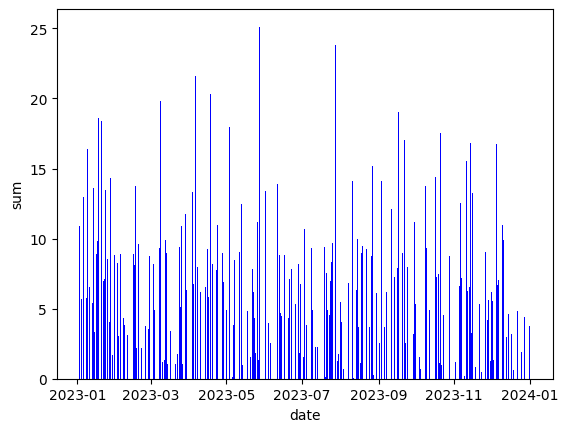

In [43]:
plt.bar(daily_info['date_time'],daily_info['sum'],color='blue')
plt.xlabel('date')
plt.ylabel('sum')
plt.show()

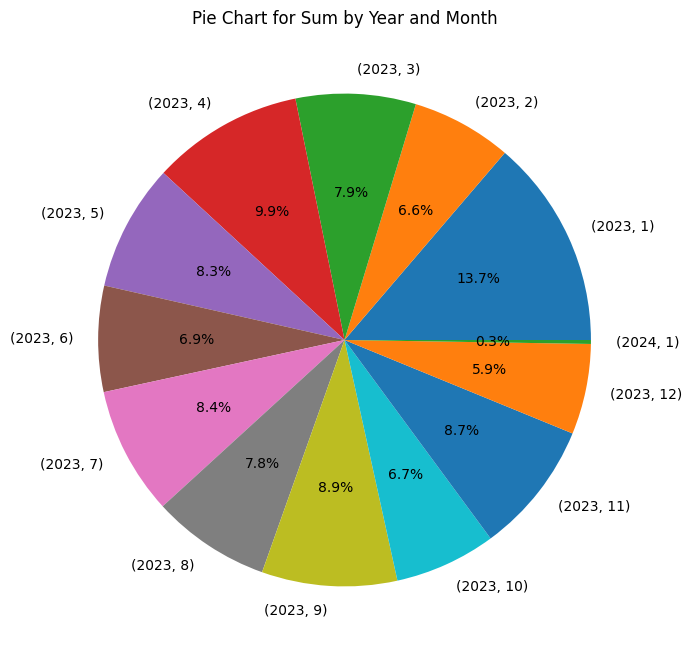

In [44]:
daily_info['year'] = daily_info['date_time'].dt.year
daily_info['month'] = daily_info['date_time'].dt.month
monthly_sum = daily_info.groupby(['year', 'month'])['sum'].sum()

plt.figure(figsize=(8, 8))
plt.pie(monthly_sum, labels=monthly_sum.index, autopct='%1.1f%%')
plt.title('Pie Chart for Sum by Year and Month')
plt.show()